# Импорт данных для построения дашборда

Создадим подключение к базе, и сохраним полученный резлуьтат в переменную

In [2]:
# импортируем библиотеки
!pip install psycopg2
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

query = ''' SELECT *
            FROM dash_visits
        '''

dash_visits = pd.io.sql.read_sql(query, con = engine)

Выведем на экран полученный датасет

In [3]:
dash_visits

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
...,...,...,...,...,...,...
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1


# Предобработка данных

С помощью функции выполним автоматическую проверку данных в датасете

In [9]:
#функцие будем передавать датасет, в цикле будем перебирать столбцы
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')                                 
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений',dataset[column].nunique()) #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитаем количество столбцов в датасете
    print('Количество полных дубликатов строк: ',dataset.duplicated().sum()) 

In [10]:
dataset_info(dash_visits)

Название столбца:      record_id
Длина столбца:         30745
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[1040597 1040598 1040599 ... 1071339 1071340 1071341]
Количество уникальных значений 30745
----------------
Название столбца:      item_topic
Длина столбца:         30745
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Деньги' 'Дети' 'Женская психология' 'Женщины' 'Здоровье' 'Знаменитости'
 'Интересные факты' 'Искусство' 'История' 'Красота' 'Культура' 'Наука'
 'Общество' 'Отношения' 'Подборки' 'Полезные советы' 'Психология'
 'Путешествия' 'Рассказы' 'Россия' 'Семья' 'Скандалы' 'Туризм' 'Шоу'
 'Юмор']
Количество уникальных значений 25
----------------
Название столбца:      source_topic
Длина столбца:         30745
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Авто' 'Деньги' 'Дети' 'Еда' 'Здоровье' 'Знаменитости' 'Интерьеры'
 'Искусство' 'История' 'Кино' 'Музыка' 'Одежда' 'Полезные сов

После проверки имеем следующее:
Всего в датасете 6 столбцов, 30745 строк, полных дубликатов строк нет.

столбец `record_id`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* все записи уникальны.

столбец `item_topic`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* содержит 25 уникальных значений.

столбец `source_topic`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* содержит 26 уникальных значений.

столбец `age_segment`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* содержит 6 уникальных значений.

столбец `dt`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* содержит 17 уникальных значений.

столбец `visits`:
* число строк -30745;
* пропуски отсутствуют;
* тип данных корректный;
* содержит 212 уникальных значений.

Данные в хорошем состоянии, можно использовать для дальнейшего анализа.

Дополнительно посмотрим количество уникаьных значений их количество с столбцах `item_topic`, `source_topic`, `age_segment`

In [11]:
dash_visits['item_topic'].value_counts()

Отношения             1536
Интересные факты      1535
Наука                 1505
Подборки              1456
Полезные советы       1424
Общество              1422
Россия                1385
История               1363
Семья                 1287
Путешествия           1247
Деньги                1234
Женщины               1230
Дети                  1229
Туризм                1206
Здоровье              1203
Красота               1193
Культура              1160
Юмор                  1129
Искусство             1119
Рассказы              1109
Психология            1056
Скандалы              1023
Знаменитости           976
Женская психология     914
Шоу                    804
Name: item_topic, dtype: int64

Мы имеем топ-3 популярных тем: Отношения, Интересные факты, Наука.

Посмотрим топ-3 источников:

In [12]:
dash_visits['source_topic'].value_counts()

Семейные отношения    1822
Россия                1687
Знаменитости          1650
Полезные советы       1578
Путешествия           1563
Кино                  1505
Дети                  1459
История               1437
Семья                 1405
Одежда                1379
Здоровье              1243
Искусство             1228
Авто                  1077
Психология            1055
Сад и дача            1036
Политика              1024
Спорт                 1007
Сделай сам             995
Ремонт                 985
Деньги                 973
Еда                    912
Интерьеры              809
Строительство          758
Музыка                 750
Технологии             741
Финансы                667
Name: source_topic, dtype: int64

Топ-3 источников выглядит так: Семейные отношения, Россия, Знаменитости.

Посмотрим на сегменты по возрасту:

In [13]:
dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

Большую массу пользоватлей составляют люди возраста: 18-25 лет, затем идут 26-30 и лишь потом 31-35.

Посмотрим за какой период у нас имеются данные

In [16]:
print('Минимальная дата в данных:',dash_visits['dt'].min(),\
      '\nМаксимальная дата в данных:',dash_visits['dt'].max(),
     '\nИмеем данные за период:',dash_visits['dt'].max()-dash_visits['dt'].min())

Минимальная дата в данных: 2019-09-24 18:28:00 
Максимальная дата в данных: 2019-09-24 19:00:00 
Имеем данные за период: 0 days 00:32:00


Данные мы имеем в периоде 32 минут 24 сентября 2019 года, с 18:28 до 19:00.

Взглянем на частоту посещений:

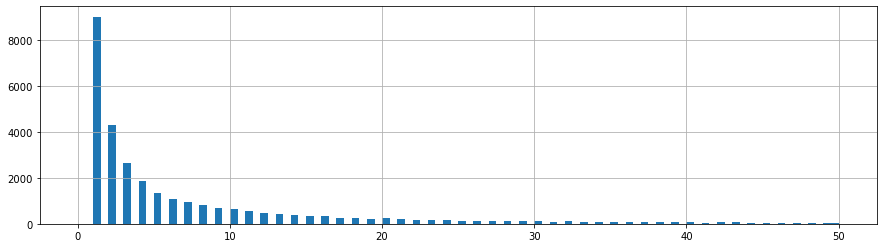

In [24]:
dash_visits['visits'].hist(bins=100, figsize=(15,4), range=(0,50)); 

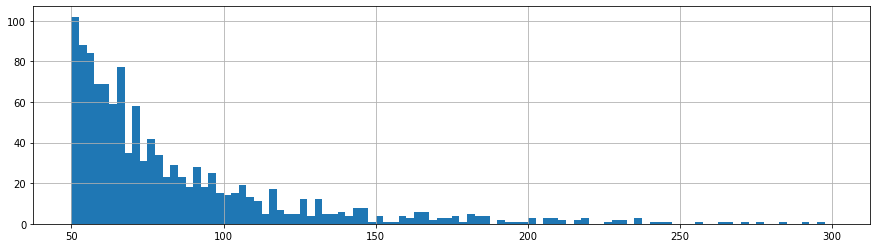

In [25]:
dash_visits['visits'].hist(bins=100, figsize=(15,4), range=(50,300));

В основной своей массе, лди совершают до 50 действий.

In [17]:
dash_visits.to_csv('dash_visits.csv', index=False)

Проверим успешность записи данных:

In [18]:
display(pd.read_csv('dash_visits.csv').head(10))

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


# Вывод

Данные успешно импортированы, изучены и сохранены. В данных пропусков, можем переходить к построению дашборда.